In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib
from matplotlib import pyplot as plt

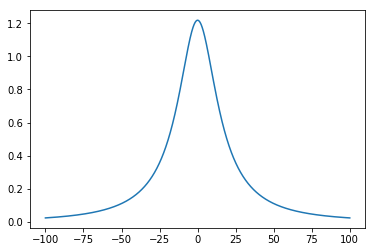

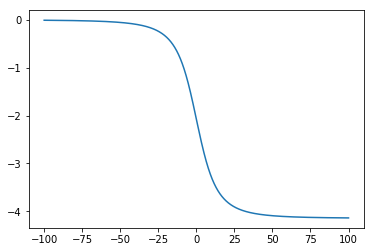

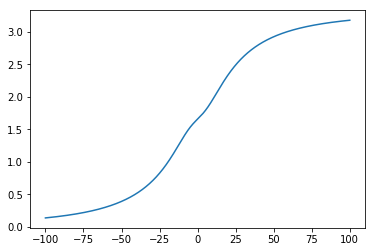

In [73]:
#q1

def hat(v):
    return v/la.norm(v)

def linev(r1, r2, r0):
    if la.norm(np.cross(r2-r1,r0-r1)) == 0:
        return 0
    ra = r1 - r0
    rb = r2 - r0
    rv = r2 - r1
    rah = hat(ra)
    rbh = hat(rb)
    rvh = hat(rv)
    return 1/(4*np.pi) * np.cross(ra, rvh)/la.norm(np.cross(ra, rvh))**2 * np.dot( rvh , (rbh-rah) )

def seminfv(r1, rv, r0):
    if la.norm(np.cross(r1-r0, rv)) == 0:
        return 0
    ra = r1 - r0
    rah = hat(ra)
    rvh = hat(rv)
    return 1/(4*np.pi) * np.cross(ra, rvh)/la.norm(np.cross(ra, rvh))**2 * (1 - np.dot(rah, rvh))

def hsv(r0, t1, t2, direction): #tip 1, tip2, direction of horshoe
    return linev(t1, t2, r0) - seminfv(t1, direction, r0) + seminfv(t2, direction, r0)

Γ = 533.8
d = np.array([1, 0, 0])
t1 = np.array([0, -40, 0])
t2 = np.array([0, 40, 0])
line = np.linspace(-100, 100, 4000)
y, z = 50, 10
vx, vy, vz = [], [], []
for x in line:
    r0 = np.array([x, y, z])
    v = hsv(r0, t1, t2, d)
    vx.append(v[0]*Γ)
    vy.append(v[1]*Γ)
    vz.append(v[2]*Γ)

plt.plot(line, vx)
plt.show()

plt.plot(line, vy)
plt.show()

plt.plot(line, vz)
plt.show()



In [28]:
print(seminfv( np.array([0,0,0]), np.array([1, 0, 0]), np.array([0, 1, 2.1])))

[ 0.         -0.03088959  0.01470933]


In [75]:
#q4 follower
l1 = np.array([0, -1, 0])
l2 = np.array([0, 1, 0])
f11 = np.array([1, -4, 0])
f12 = np.array([1, -2, 0])
f21 = np.array([1, 2, 0])
f22 = np.array([1, 4,0])
xdir = np.array([1,0,0])

r0 = np.array([0, 0, 0])
r1 = np.array([1, 3, 0])
viso = hsv(r0, l1, l2, xdir)

v0 = hsv(r0, l1, l2, xdir) + hsv(r0, f11, f12, xdir) + hsv(r0, f21, f22, xdir)
v1 = hsv(r1, l1, l2, xdir) + hsv(r1, f11, f12, xdir) + hsv(r1, f21, f22, xdir)

print(v0[2]/viso[2], v1[2]/viso[2])

0.8372575823454796 0.8027997802558317


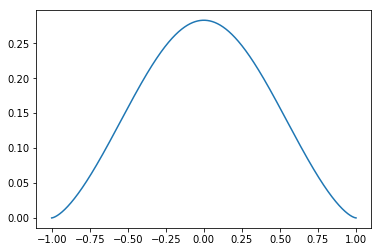

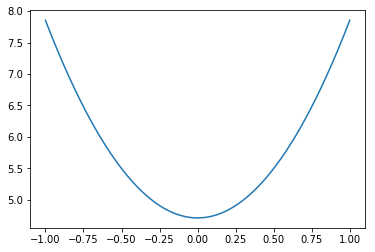

In [6]:
e = 0.000001
s = 1
φ = np.linspace(e, np.pi-e, 10000)
η = -s*np.cos(φ)
c = s*8*(np.sin(φ))**3/(3*np.pi*(4+np.cos(2*φ)))

plt.plot(η, c)
plt.show()

cl = 2*np.pi*(1 + 0.25*np.cos(2*φ))

plt.plot(η, cl)
plt.show()